# <span style="color:darkred">  Esercitazione 5</span>

#### Richiesta

Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.


Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your result for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ is equivalent?

______________________________________
##### Svolgimento

Nella simulazione sono partito dal punto $(x,y,z) = (1,1,1)$. Prima di prendere le misure ho equilibrato il sistema con 1000 mosse, con accettanza circa $1/2$. Le misure poi sono state prese su un totale di $T = 1000000$ mosse, sempre con accettanza circa $1/2$. Per eseguire l'analisi, le misure sono state suddivise in 100 blocchi. 

In [1]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

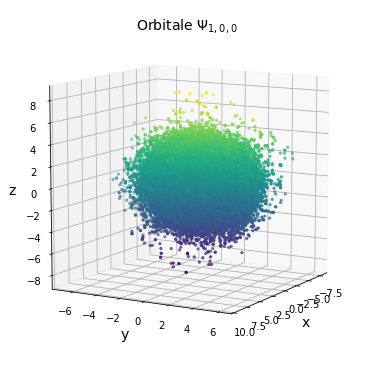

In [2]:
from mpl_toolkits.mplot3d import Axes3D
x, y, z = np.loadtxt("Es01\coordinateP1.dat", usecols=(0,1,2), delimiter=' ', unpack='true')  


fig = plt.figure(1, figsize=(5,5))
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x',fontsize= 14)
ax.set_ylabel('y',fontsize= 14)
ax.set_zlabel('z',fontsize= 14)
ax.set_title('Orbitale $\Psi_{1,0,0}$',fontsize= 14)
ax.view_init(10, 30)
plt.show()

Il grafico sopra mostra la posizione dei punti campionati durante la simulazione. Dalla visuale 3D si osserva che lo spazio investigato è quello atteso per l'orbitale $\Psi_{1,0,0}$.

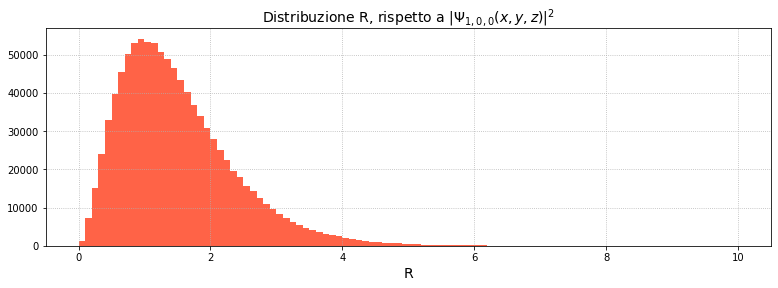

In [3]:
T = 1000000 #misure
n_bins = 100
r = np.zeros(T)
for i in range(T):
    r[i] = math.sqrt(x[i]*x[i] + y[i]*y[i] + z[i]*z[i])

plt.figure(1, figsize=(13,4))
plt.hist(r,n_bins, range=(0,10), facecolor='tomato')
plt.xlabel('R', fontsize= 14)
plt.title('Distribuzione R, rispetto a $|\Psi_{1,0,0}(x,y,z)|^2$',fontsize= 14)
plt.grid(True, linestyle='dotted')
plt.show()

Sono andato a graficare, tramite un istogramma, la distribuzione di R lungo la simulazione, in maniera tale da verificare che l'andamento fosse quello richiesto da $|\Psi_{1,0,0}(x,y,z)|^2$.  

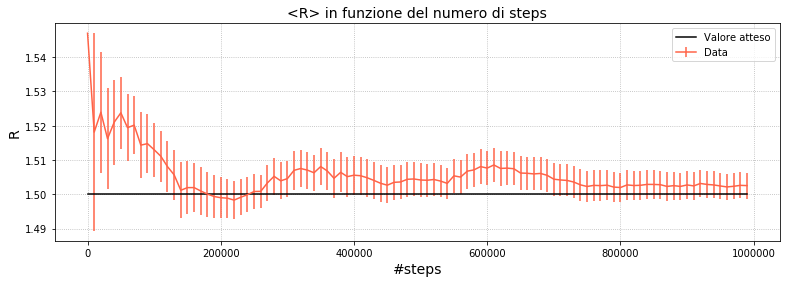

In [24]:
M = 100 #blocchi
x = np.arange(M)
y = np.zeros(M)

x = x*(T/M)
y = y+3/2
r, error = np.loadtxt("Es01\misureR1.dat", usecols=(0,1), delimiter=' ', unpack='true')

plt.figure(1, figsize=(13,4))
plt.errorbar(x, r, yerr=error, color='tomato', label = 'Data')
plt.plot(x,y, color='black', label = 'Valore atteso')
plt.title('<R> in funzione del numero di steps', fontsize = 14)
plt.xlabel('#steps',fontsize= 14)
plt.ylabel('R', fontsize= 14)
plt.grid(True, linestyle='dotted')
plt.legend()

plt.show()

Tramite il grafico dell'andamento di <r> si osserva che al termine della simulazione il suo valore è compatibile, nel range dell'errore, con il valore atteso(linea nera). 

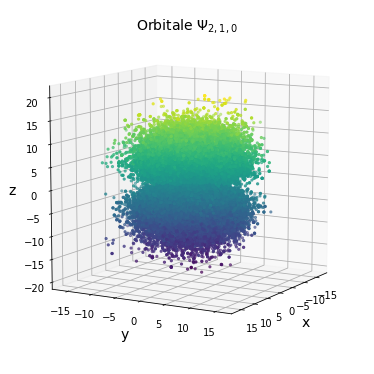

In [5]:
x, y, z = np.loadtxt("Es01\coordinateP2.dat", usecols=(0,1,2), delimiter=' ', unpack='true')  

fig = plt.figure(1, figsize=(5,5))
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x',fontsize= 14)
ax.set_ylabel('y',fontsize= 14)
ax.set_zlabel('z',fontsize= 14)
ax.set_title('Orbitale $\Psi_{2,1,0}$',fontsize= 14)
ax.view_init(10, 30)
plt.show()

Il grafico sopra mostra la posizione dei punti campionati durante la simulazione. Dalla visuale 3D si osserva che lo spazio investigato è quello atteso per l'orbitale $\Psi_{2,1,0}$.

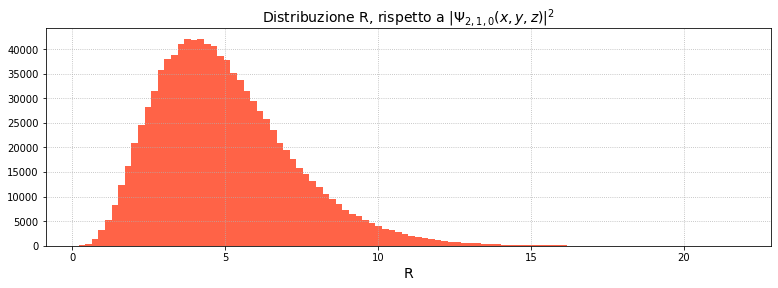

In [6]:
r = np.zeros(T)
for i in range(T):
    r[i] = math.sqrt(x[i]*x[i] + y[i]*y[i] + z[i]*z[i])

    plt.figure(1, figsize=(13,4))
plt.hist(r,n_bins, facecolor='tomato')
plt.xlabel('R',fontsize= 14)
plt.title('Distribuzione R, rispetto a $|\Psi_{2,1,0}(x,y,z)|^2$',fontsize= 14)
plt.grid(True, linestyle='dotted')
plt.show()

Sono andato a graficare, tramite un istogramma, la distribuzione di R lungo la simulazione, in maniera tale da verificare che l'andamento fosse quello richiesto da $|\Psi_{2,1,0}(x,y,z)|^2$.  

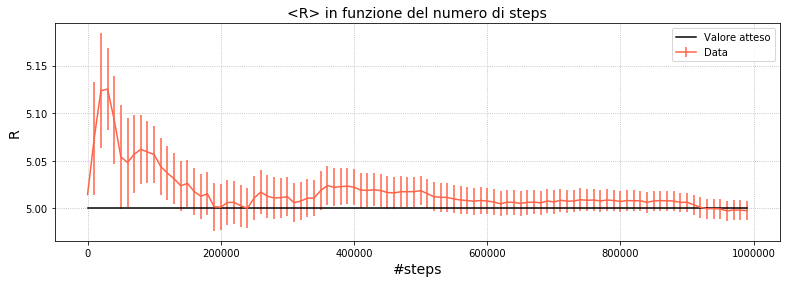

In [25]:
M = 100 #blocchi
x = np.arange(M)
y = np.zeros(M)

x = x*(T/M)
y = y+5
r, error = np.loadtxt("Es01\misureR2.dat", usecols=(0,1), delimiter=' ', unpack='true')

plt.figure(1, figsize=(13,4))
plt.errorbar(x, r, yerr=error, color='tomato', label = 'Data')
plt.plot(x,y, color='black', label = 'Valore atteso')
plt.title('<R> in funzione del numero di steps', fontsize = 14)
plt.xlabel('#steps',fontsize= 14)
plt.ylabel('R', fontsize= 14)
plt.grid(True, linestyle='dotted')
plt.legend()
plt.show()

Anche nel caso del secondo orbitale, il valore di <r> è compatibile con il valore atteso (linea nera).

______________________________________
**What do you observe when you start very far from the origin?**

Partendo da un punto molto lontano dell'origine, che in questo caso è significato partire dal punto (800,800,800), il sistema non riesce ad equilibrare in una configurazione stabile, ma la particella rimane dispersa per lo spazio, come se non fosse soggetta a nessun potenziale.

Di seguito sono riportati i grafici per la distribuzione di R, e per l'andamento di <R>, prima rispetto a $|\Psi_{1,0,0}(x,y,z)|^2$, e poi rispetto a $|\Psi_{2,1,0}(x,y,z)|^2$.

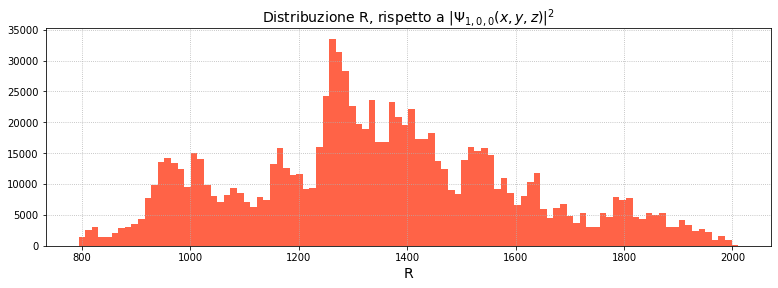

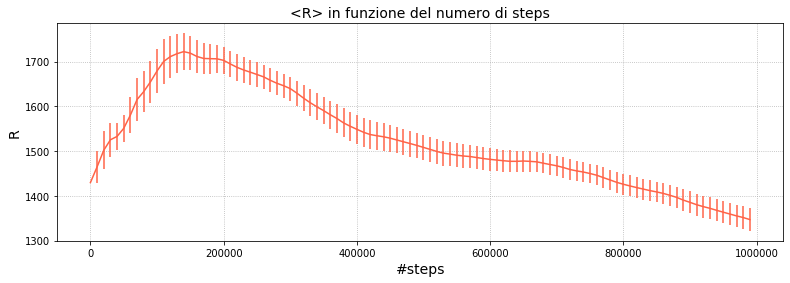

In [30]:
x, y, z = np.loadtxt("Es01\coordinateP1_far.dat", usecols=(0,1,2), delimiter=' ', unpack='true')  

T = 1000000 #misure
n_bins = 100
r = np.zeros(T)
for i in range(T):
    r[i] = math.sqrt(x[i]*x[i] + y[i]*y[i] + z[i]*z[i])
    
    
    
fig = plt.figure(1, figsize=(13,4))
plt.hist(r,n_bins, facecolor='tomato')
plt.xlabel('R', fontsize= 14)
plt.title('Distribuzione R, rispetto a $|\Psi_{1,0,0}(x,y,z)|^2$',fontsize= 14)
plt.grid(True, linestyle='dotted')
plt.show()

M = 100 #blocchi
x = np.arange(M)

x = x*(T/M)
r, error = np.loadtxt("Es01\misureR1_far.dat", usecols=(0,1), delimiter=' ', unpack='true')

plt.figure(2, figsize=(13,4))
plt.errorbar(x, r, yerr=error, color='tomato', label = 'Data')
plt.title('<R> in funzione del numero di steps', fontsize = 14)
plt.xlabel('#steps',fontsize= 14)
plt.ylabel('R', fontsize= 14)
plt.grid(True, linestyle='dotted')

plt.show()

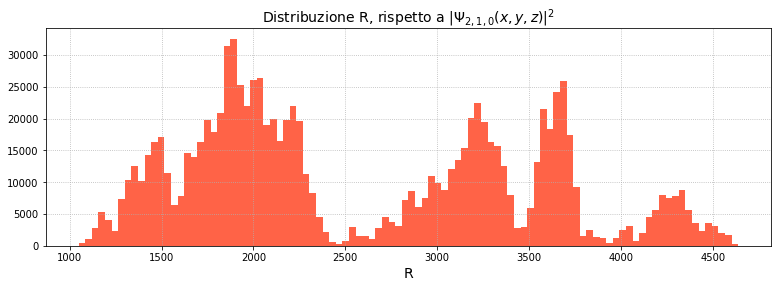

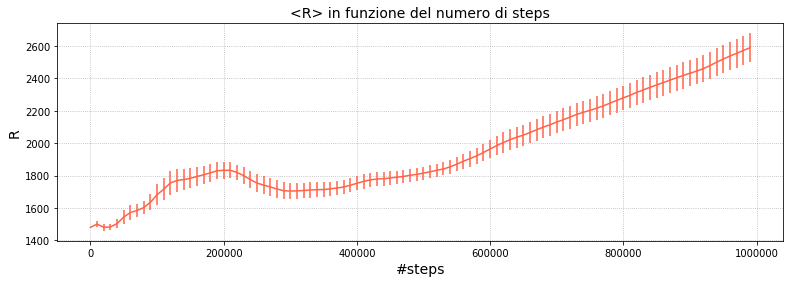

In [31]:
x, y, z = np.loadtxt("Es01\coordinateP2_far.dat", usecols=(0,1,2), delimiter=' ', unpack='true')  

T = 1000000 #misure
n_bins = 100
r = np.zeros(T)
for i in range(T):
    r[i] = math.sqrt(x[i]*x[i] + y[i]*y[i] + z[i]*z[i])
    
fig = plt.figure(1, figsize=(13,4))
plt.hist(r,n_bins, facecolor='tomato')
plt.xlabel('R', fontsize= 14)
plt.title('Distribuzione R, rispetto a $|\Psi_{2,1,0}(x,y,z)|^2$',fontsize= 14)
plt.grid(True, linestyle='dotted')
plt.show()

M = 100 #blocchi
x = np.arange(M)
y = np.zeros(M)

x = x*(T/M)
r, error = np.loadtxt("Es01\misureR2_far.dat", usecols=(0,1), delimiter=' ', unpack='true')

plt.figure(2, figsize=(13,4))
plt.errorbar(x, r, yerr=error, color='tomato', label = 'Data')
plt.title('<R> in funzione del numero di steps', fontsize = 14)
plt.xlabel('#steps',fontsize= 14)
plt.ylabel('R', fontsize= 14)
plt.grid(True, linestyle='dotted')

plt.show()

______________________________

**If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your result for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ is equivalent?**

Di seguito riporto il confronto fra la probabilità di transizione uniforme e la probilità di transizione guassiana. 
Quello che si osserva è che le misure convergono in entrambi i casi al valore atteso. L'unica differenza è nella velocità di convergenza, che risulta essere maggiore nel caso della probabilità di transizione gaussiana.

I grafici sono riferiti nel primo caso alla $|\Psi_{1,0,0}(x,y,z)|^2$, e nel secondo alla $|\Psi_{2,1,0}(x,y,z)|^2$. Per entrambe le simulazione il valore di accettazione della transizione risulta essere intorno al 50%.

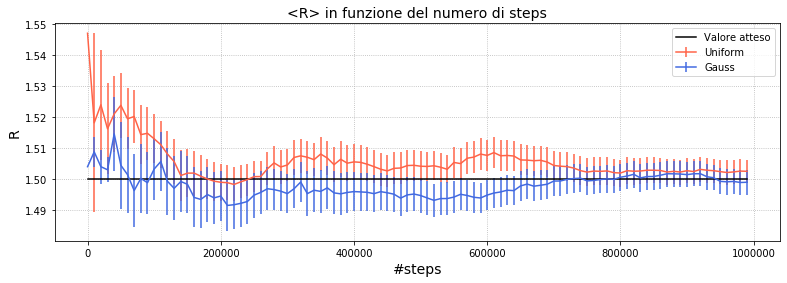

In [28]:
M = 100 #blocchi
x = np.arange(M)
y = np.zeros(M)

x = x*(T/M)
y = y+3/2
r, error = np.loadtxt("Es01\misureR1.dat", usecols=(0,1), delimiter=' ', unpack='true')
r_gauss, error_gauss= np.loadtxt("Es02\misureR1.dat", usecols=(0,1), delimiter=' ', unpack='true')

plt.figure(1, figsize=(13,4))
plt.errorbar(x, r, yerr=error, color='tomato', label = 'Uniform')
plt.errorbar(x, r_gauss, yerr=error_gauss, color='royalblue', label = 'Gauss')
plt.plot(x,y, color='black', label = 'Valore atteso')
plt.title('<R> in funzione del numero di steps', fontsize = 14)
plt.xlabel('#steps',fontsize= 14)
plt.ylabel('R', fontsize= 14)
plt.grid(True, linestyle='dotted')
plt.legend()

plt.show()

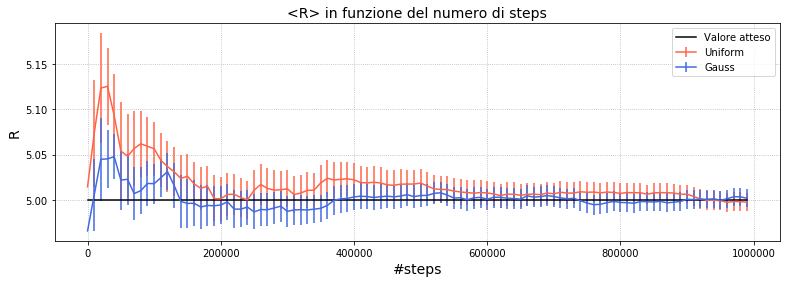

In [29]:
M = 100 #blocchi
x = np.arange(M)
y = np.zeros(M)

x = x*(T/M)
y = y+5
r, error = np.loadtxt("Es01\misureR2.dat", usecols=(0,1), delimiter=' ', unpack='true')
r_gauss, error_gauss= np.loadtxt("Es02\misureR2.dat", usecols=(0,1), delimiter=' ', unpack='true')

plt.figure(1, figsize=(13,4))
plt.errorbar(x, r, yerr=error, color='tomato', label = 'Uniform')
plt.errorbar(x, r_gauss, yerr=error_gauss, color='royalblue', label = 'Gauss')
plt.plot(x,y, color='black', label = 'Valore atteso')
plt.title('<R> in funzione del numero di steps', fontsize = 14)
plt.xlabel('#steps',fontsize= 14)
plt.ylabel('R', fontsize= 14)
plt.grid(True, linestyle='dotted')
plt.legend()

plt.show()